# KNN

## Analyze data white_wine.csv
- Apply KNN Method (K = 3)
    - Target    : Quality (quality > 6 -> y = 1 good, y = 0 bad)
    - Features  : Density & Alcohol
- Validate the model using accuracy in 20% testing data
- Apply scalling and Validate the model using accuracy in 20% testing data
- Apply scaling Choose Factor K based on accuracy
    - K = (1, 3, 5,.....,29)

In [1]:
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv('white_wine.csv')

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [4]:
import seaborn as sns

In [5]:
wine['label'] = np.where(wine['quality']>6,1,0)

<AxesSubplot:xlabel='density', ylabel='alcohol'>

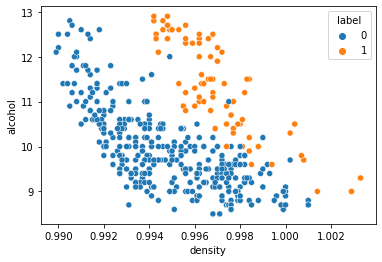

In [6]:
sns.scatterplot(x = 'density', y = 'alcohol', data = wine, hue = 'label')

In [7]:
wine[['alcohol','density']].isnull().sum()

alcohol    1
density    0
dtype: int64

In [8]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace = True)

In [9]:
x = wine[['alcohol','density']]
y = wine['label']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify = y, # stratified random sampling
    test_size = 0.2,
    random_state = 2020) # make the result consistent

# Without Scaling

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
y_predict_class = knn.predict(x_test)

In [14]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9038461538461539


# With Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaler.fit(x_train) # preprocess fit
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_scaled,y_train) # model fit
y_predict_class = knn.predict(x_test_scaled) # model predict

In [18]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9807692307692307


The accuracy improved from 0.9038 to 0.98076 after we applied scaling

# Choose Factor K

In [19]:
import matplotlib.pyplot as plt

In [20]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_scaled,y_train)
    
    y_predict_train = knn.predict(x_train_scaled)
    training_accuracies.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test = knn.predict(x_test_scaled)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracies.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\l

([<matplotlib.axis.XTick at 0x1d7f6884ca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

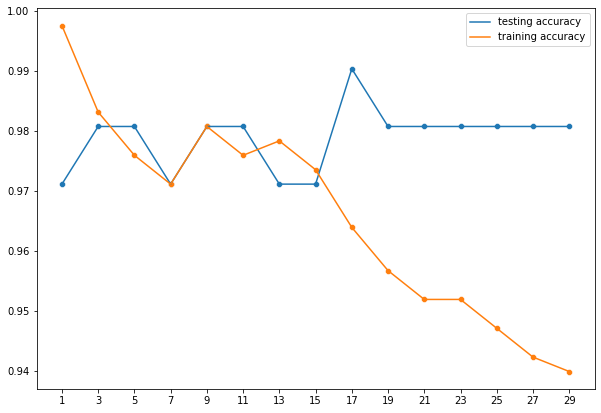

In [21]:
plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))

In [22]:
print('best k:', best_k)
print('accuracy:',score)

best k: 17
accuracy: 0.9903846153846154


The best factor k for this case os 17 with 99.03 % accuracy.The performance improved again from 98.76% accuracy to 99.03% accuracy.